In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("train-data.csv", sep = ';')

dataset = dataset.dropna(subset = ["Month 1"])

for column in ["Month 1", "Month 2", "Month 3", "Month 4"]:
    dataset[column] = dataset[column].str.replace(" ", "").dropna().astype(int)

dataset.head()

def data_corr(df, size = None, cols = None):
    cols = df.columns if cols is None else cols 
    size = (len(cols), len(cols)) if size is None else size
    plt.figure(figsize = size)
    sns.heatmap(df.corr(), cmap = "coolwarm", square = True, vmin = -1, vmax = 1, annot=True)
    plt.show()

In [3]:
dataset.head(20)

,index,id_product,Region,Country,Site,Operations,Zone,Cluster,Reference proxy,Product Line proxy,Division proxy,Customer Persona proxy,Strategic Product Family proxy,Product Life cycel status,Date,Month 1,Month 2,Month 3,Month 4
0,645874,156160,EUROPE,DE,NL_DC_Venray,Europe Operations,DACH,Germany,reference-13523,Product Line-4,Division-3,Customer Segmentation-3,Strategic Product Family-12,NaN,may-aug 2021,0,0,0,0
1,469488,224631,CHINA,CN,CN_DC_Shanghai,China Operations,China & HK,China,reference-12778,Product Line-4,Division-3,Customer Segmentation-14,Strategic Product Family-9,NaN,jan-apr 2021,0,1,0,0
2,348904,104047,EUROPE,GB,NL_DC_HLD,Europe Operations,UK and Ireland,United Kingdom,reference-3513,Product Line-3,Division-2,Customer Segmentation-23,Strategic Product Family-7,NaN,jan-apr 2021,0,2,0,0
3,1725822,11823,EAJP,AU,AU_DC_Perth,International Operations,Pacific,Australia,reference-672,Product Line-1,Division-1,Customer Segmentation-11,Strategic Product Family-3,NaN,jan-apr 2023,0,0,0,0
4,404781,159924,EUROPE,ES,NL_DC_HLD,Europe Operations,Iberia,Spain,reference-3496,Product Line-3,Division-2,Customer Segmentation-14,Strategic Product Family-7,NaN,jan-apr 2021,0,0,0,0
5,149445,149445,EUROPE,ES,ES_DC_IberiaSantBoi,Europe Operations,Iberia,Spain,reference-7529,Product Line-4,Division-3,Customer Segmentation-3,Strategic Product Family-9,NPI,sep-dec 2020,0,0,0,0
6,1004752,25324,EAJP,AU,AU_DC_Sydney,International Operations,Pacific,Australia,reference-1882,Product Line-1,Division-1,Customer Segmentation-7,Strategic Product Family-4,NaN,jan-apr 2022,0,0,2,0
7,168061,168061,EUROPE,NL,NL_DC_Venray,Europe Operations,BeNe,Netherlands,reference-10764,Product Line-4,Division-3,Customer Segmentation-15,Strategic Product Family-12,NaN,sep-dec 2020,0,0,0,0
8,799510,64939,NAM,US,US_DC_Mechanicsburg,North America Operations,US,USA,reference-6848,Product Line-4,Division-3,Customer Segmentation-4,Strategic Product Family-9,NPI,sep-dec 2021,0,0,0,0
9,1119813,140385,EUROPE,DE,DE_FO_BNDch,Europe Operations,DACH,Germany,reference-6404,Product Line-4,Division-3,Customer Segmentation-1,Strategic Product Family-12,NaN,jan-apr 2022,0,0,0,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2821016 entries, 0 to 3173345
Data columns (total 19 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   index                           int64 
 1   id_product                      int64 
 2   Region                          object
 3   Country                         object
 4   Site                            object
 5   Operations                      object
 6   Zone                            object
 7   Cluster                         object
 8   Reference proxy                 object
 9   Product  Line proxy             object
 10  Division proxy                  object
 11  Customer Persona proxy          object
 12  Strategic Product Family proxy  object
 13  Product Life cycel status       object
 14  Date                            object
 15  Month 1                         int32 
 16  Month 2                         int32 
 17  Month 3                         int32 
 18  Mo

In [5]:
dataset.isna().sum()

index                                   0
id_product                              0
Region                                  0
Country                                 0
Site                                    0
Operations                              0
Zone                                    0
Cluster                                 0
Reference proxy                         0
Product  Line proxy                     0
Division proxy                          0
Customer Persona proxy                  0
Strategic Product Family proxy          0
Product Life cycel status         2438010
Date                                    0
Month 1                                 0
Month 2                                 0
Month 3                                 0
Month 4                                 0
dtype: int64

In [6]:
dataset.nunique()

index                             1567105
id_product                         244857
Region                                  4
Country                                31
Site                                   88
Operations                              5
Zone                                   12
Cluster                                18
Reference proxy                     22406
Product  Line proxy                     6
Division proxy                          3
Customer Persona proxy                 72
Strategic Product Family proxy         19
Product Life cycel status               3
Date                                    8
Month 1                              4619
Month 2                              4193
Month 3                              4815
Month 4                              4218
dtype: int64

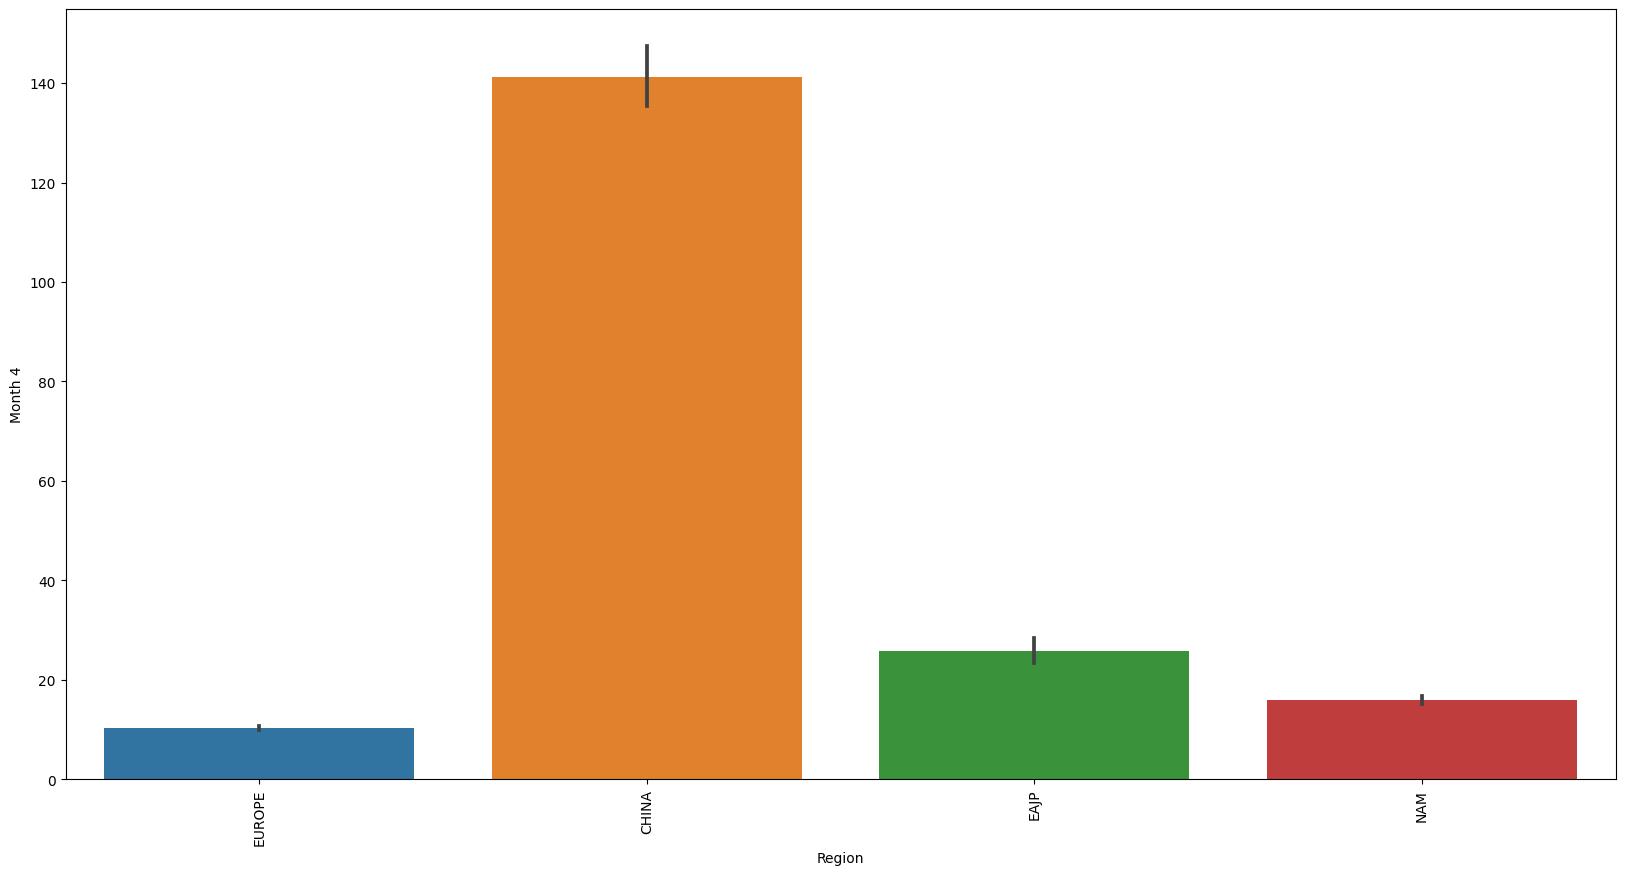

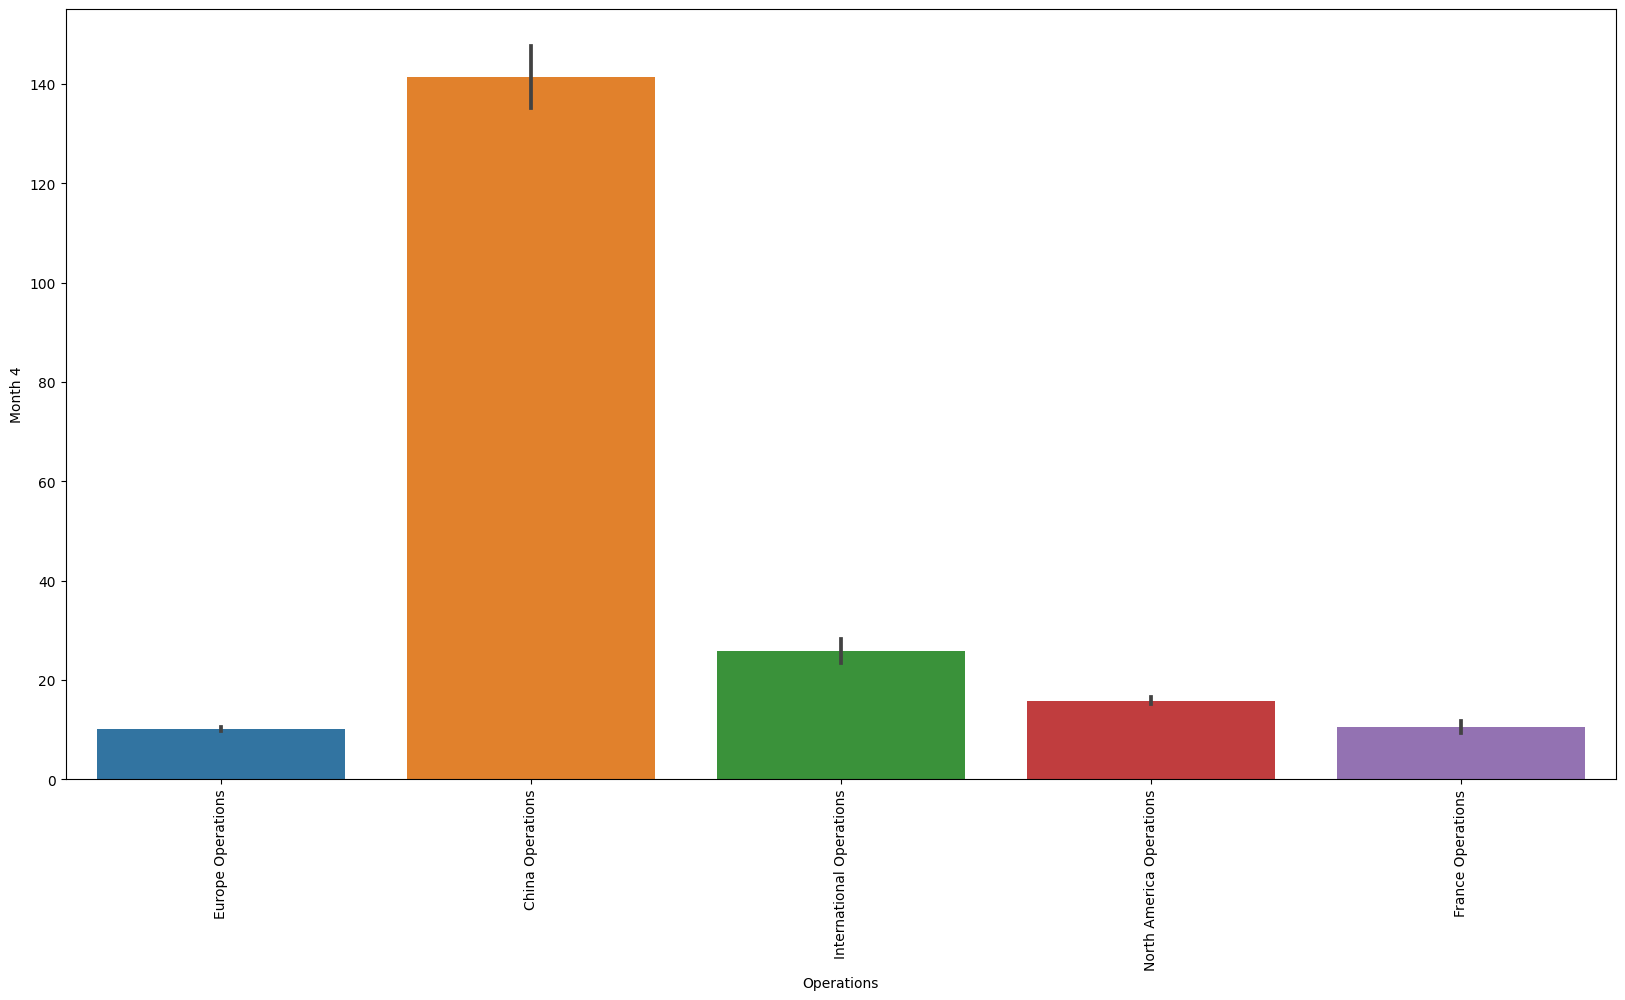

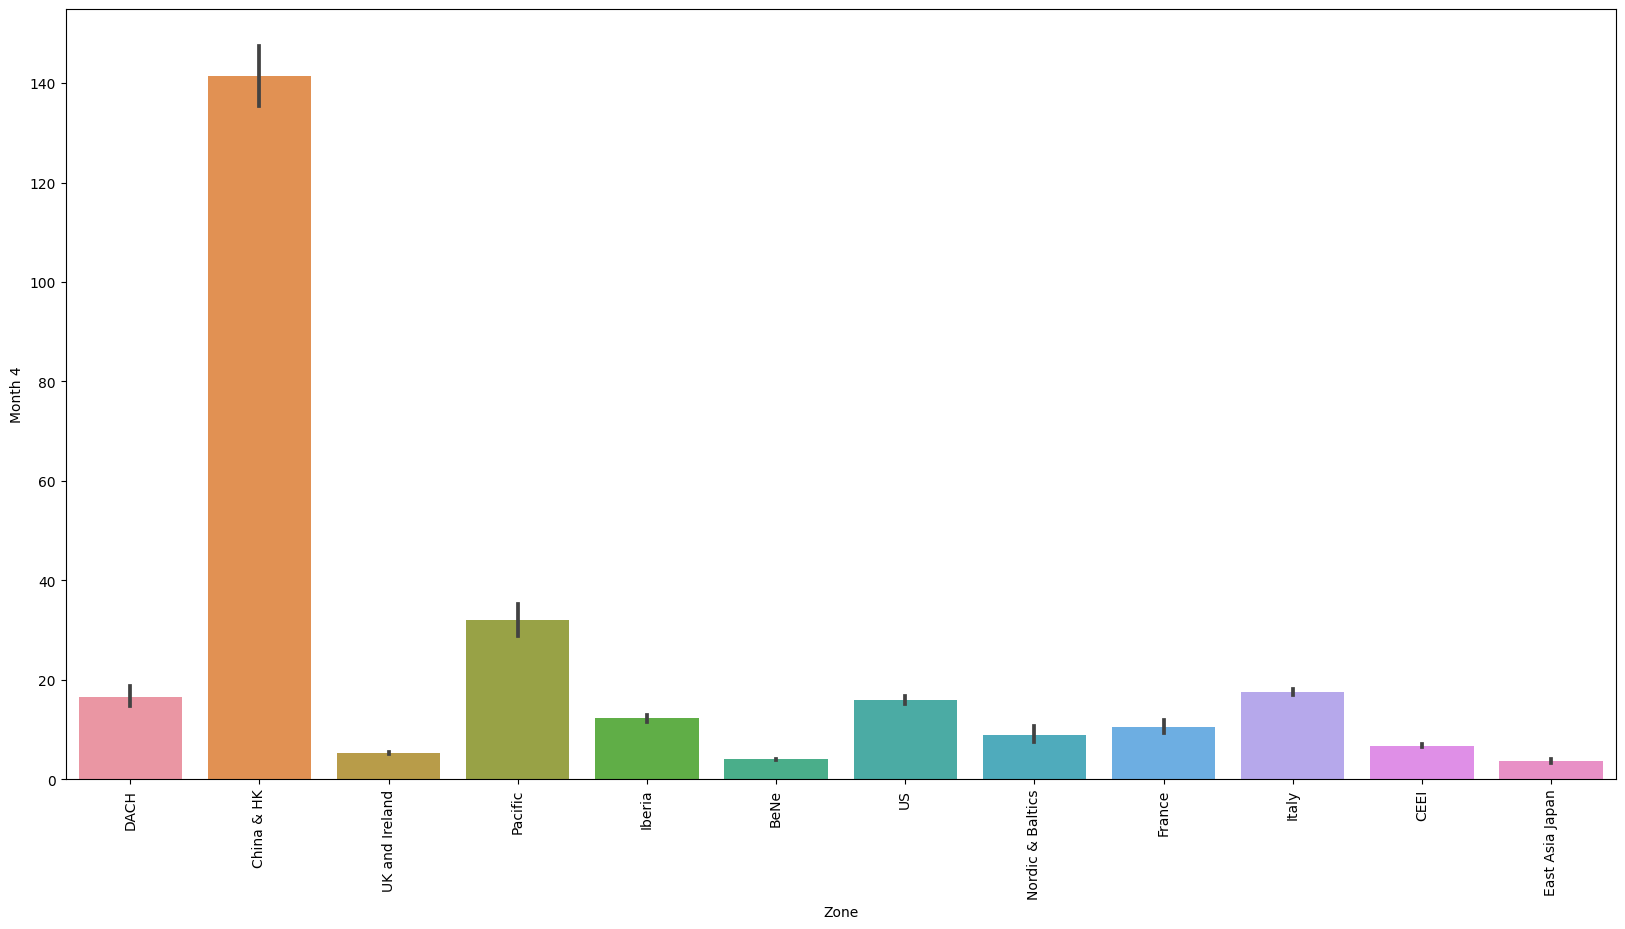

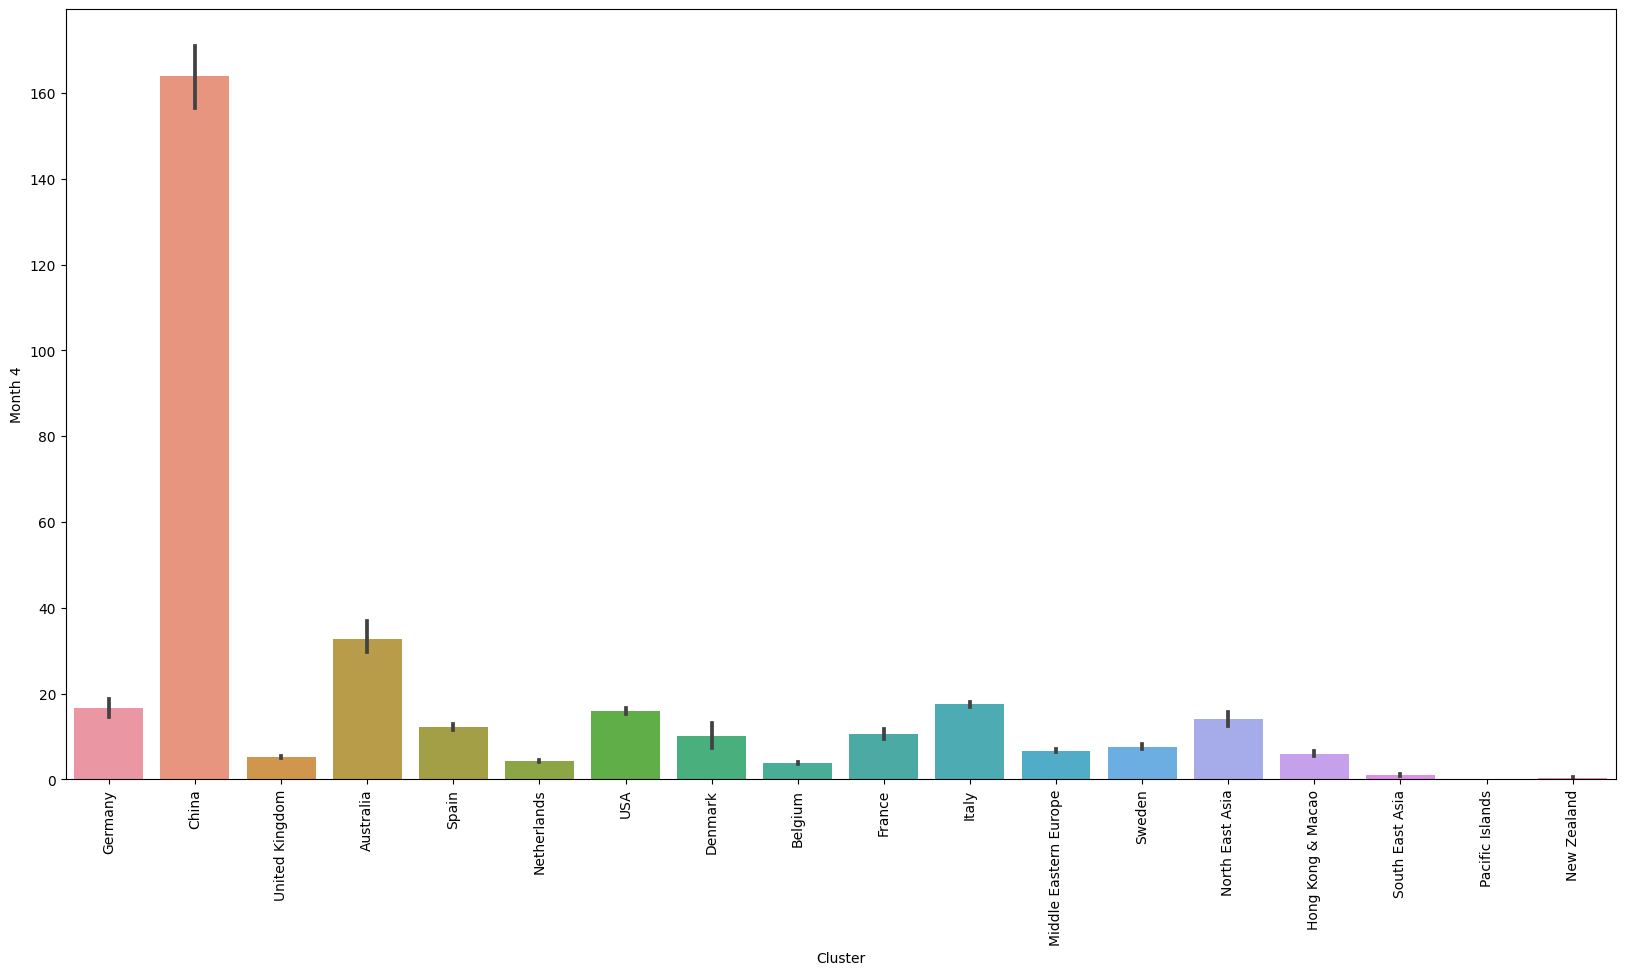

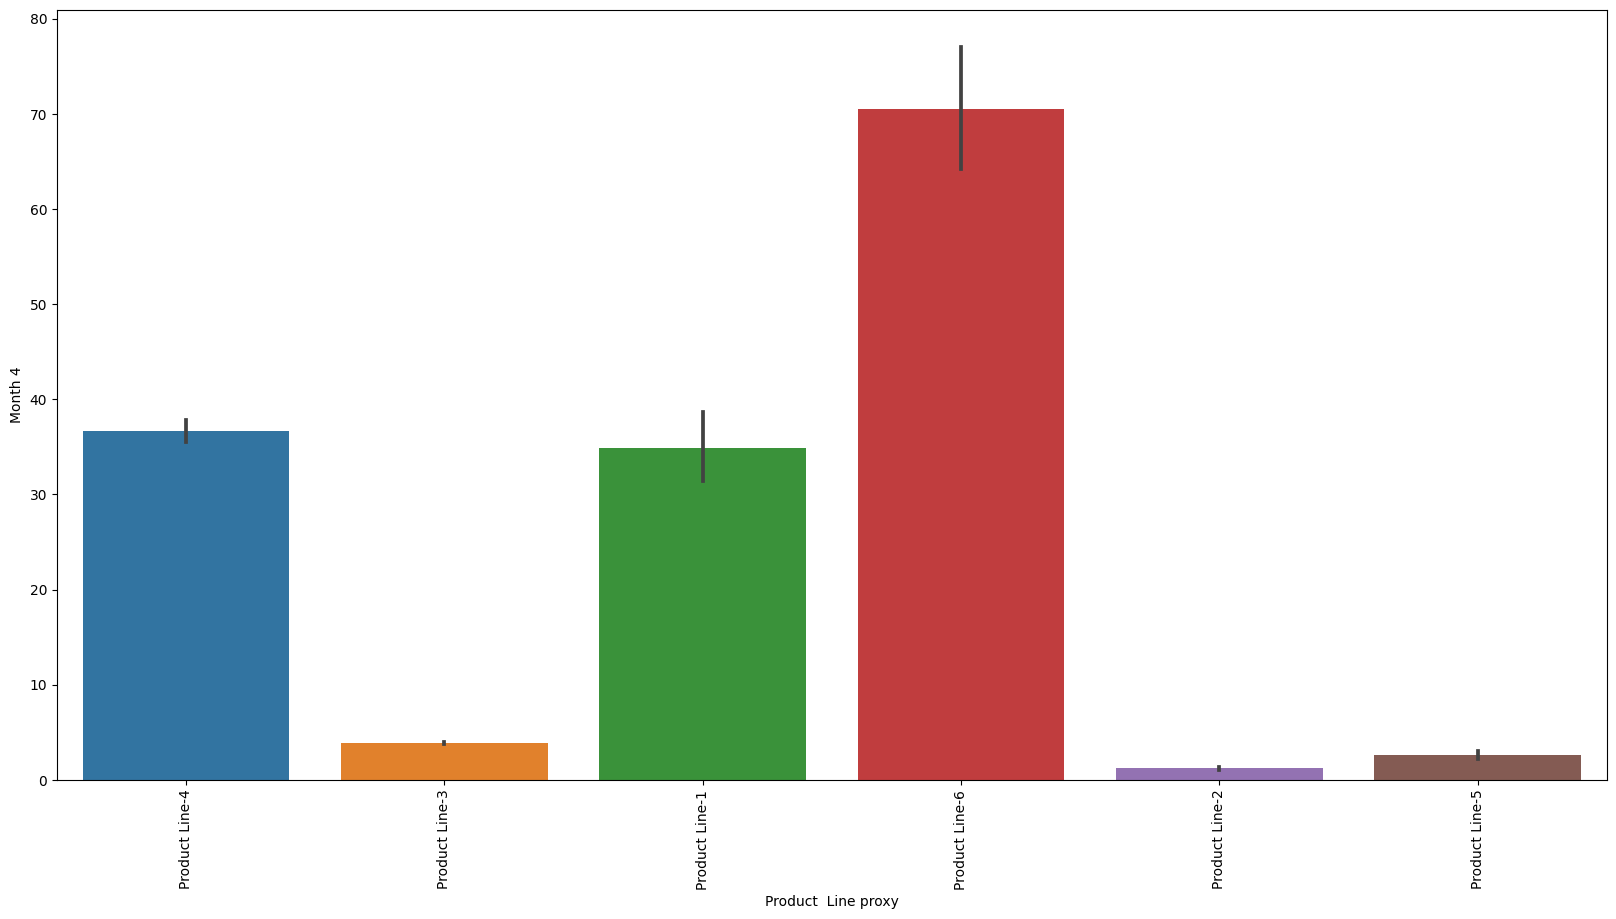

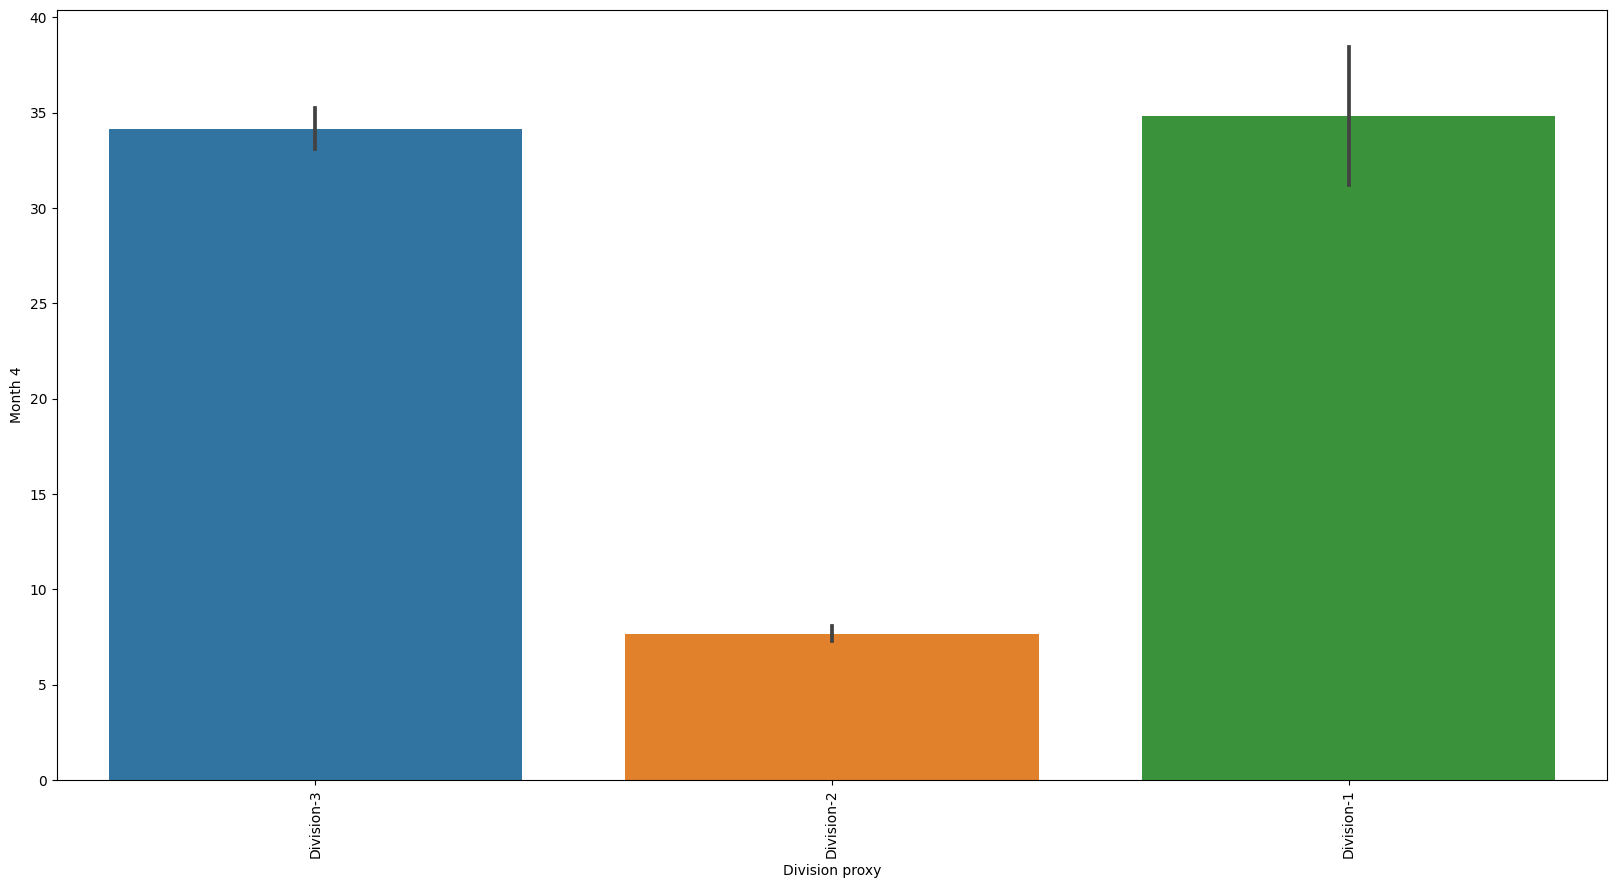

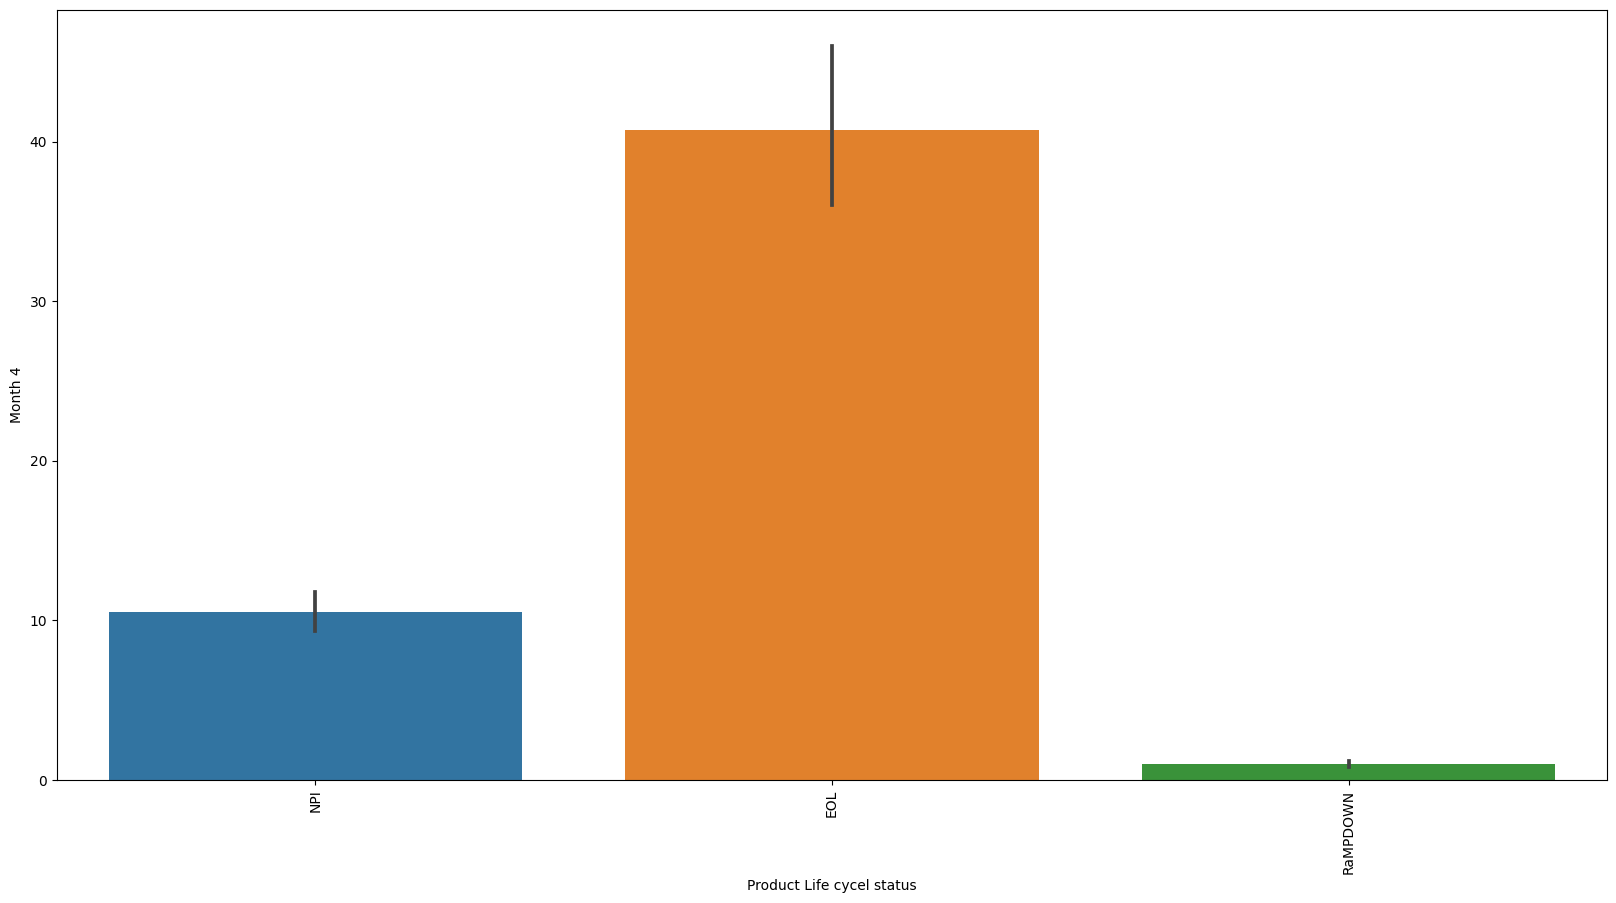

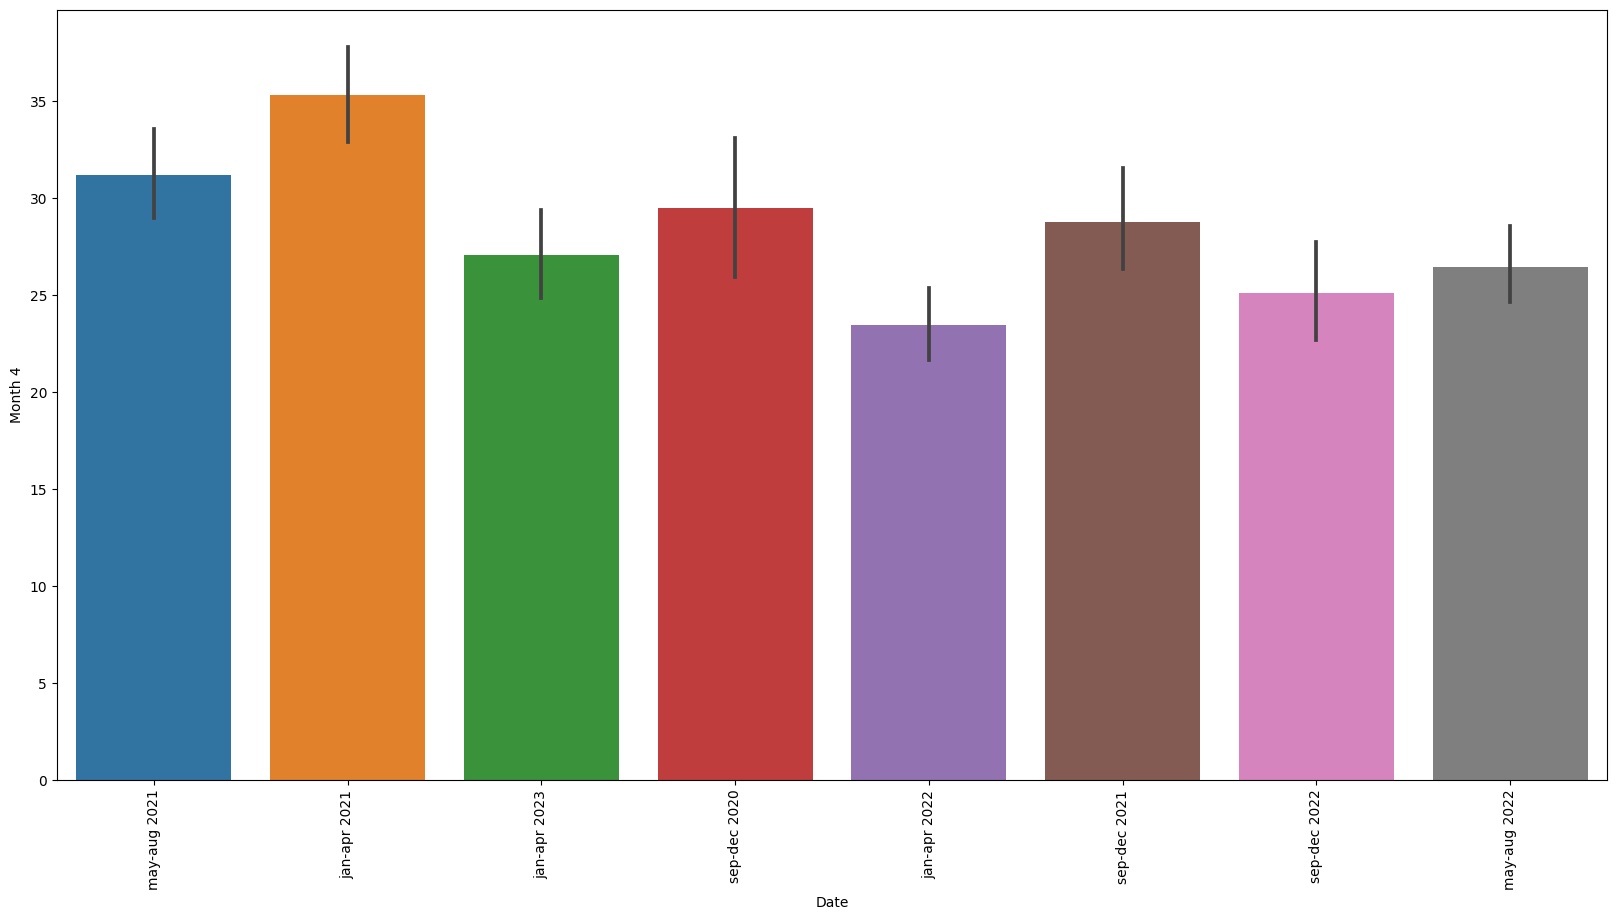

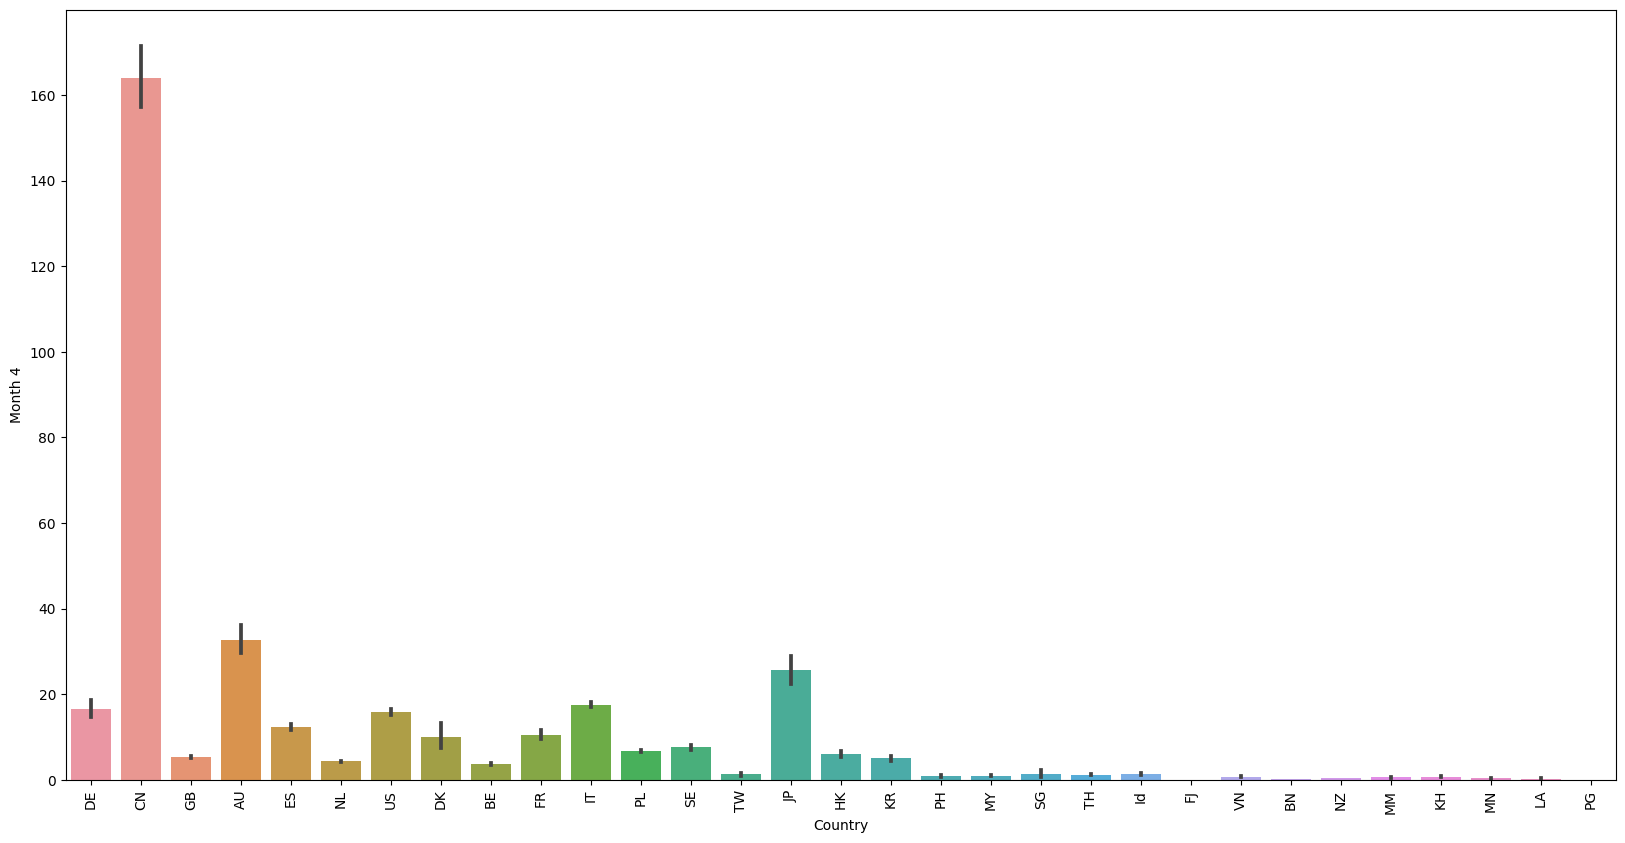

In [7]:
category_features = ["Region", "Operations", "Zone", "Cluster", "Product  Line proxy", "Division proxy", "Product Life cycel status", "Date", "Country"]

# Create barplot with frequency for each variable

for column in category_features:
    plt.figure(figsize=(20, 10))
    sns.barplot(x=dataset[column], y=dataset["Month 4"])
    # set xticks at 90 degrees
    plt.xticks(rotation=90)
    plt.show()


In [8]:
def value_counts2(df, column, counter_column):
    val_counts = {}
    for key in df[column].unique():
        count = (df.loc[df[column] == key])[counter_column]
        val_counts[key] = count.sum()
    
    
    keys = list(val_counts.keys())
    values = list(val_counts.values())
    
    return pd.DataFrame(np.transpose([keys, values]), columns = [column, counter_column])

In [9]:
data_test = value_counts2(dataset, "Country", "Month 1")

In [10]:
dataset_economic = pd.read_csv("C:\\Users\\Sheldon\\Desktop\\Code\\Hackathon\\datasets_hi4\\extra-dataset\\worldbank_economic_data.csv", sep = ',')
dataset_inflation = pd.read_csv("C:\\Users\\Sheldon\\Desktop\\Code\\Hackathon\\datasets_hi4\\extra-dataset\\worldbank_inflation_data.csv", sep = ',')

In [11]:
dataset_inflation['Energy Price Index'].corr(dataset_inflation['Headline Consumer Price Index'])

0.7580444121589808

C:\Users\Sheldon\AppData\Local\Temp\ipykernel_12900\2544014445.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = "coolwarm", square = True, vmin = -1, vmax = 1, annot=True)


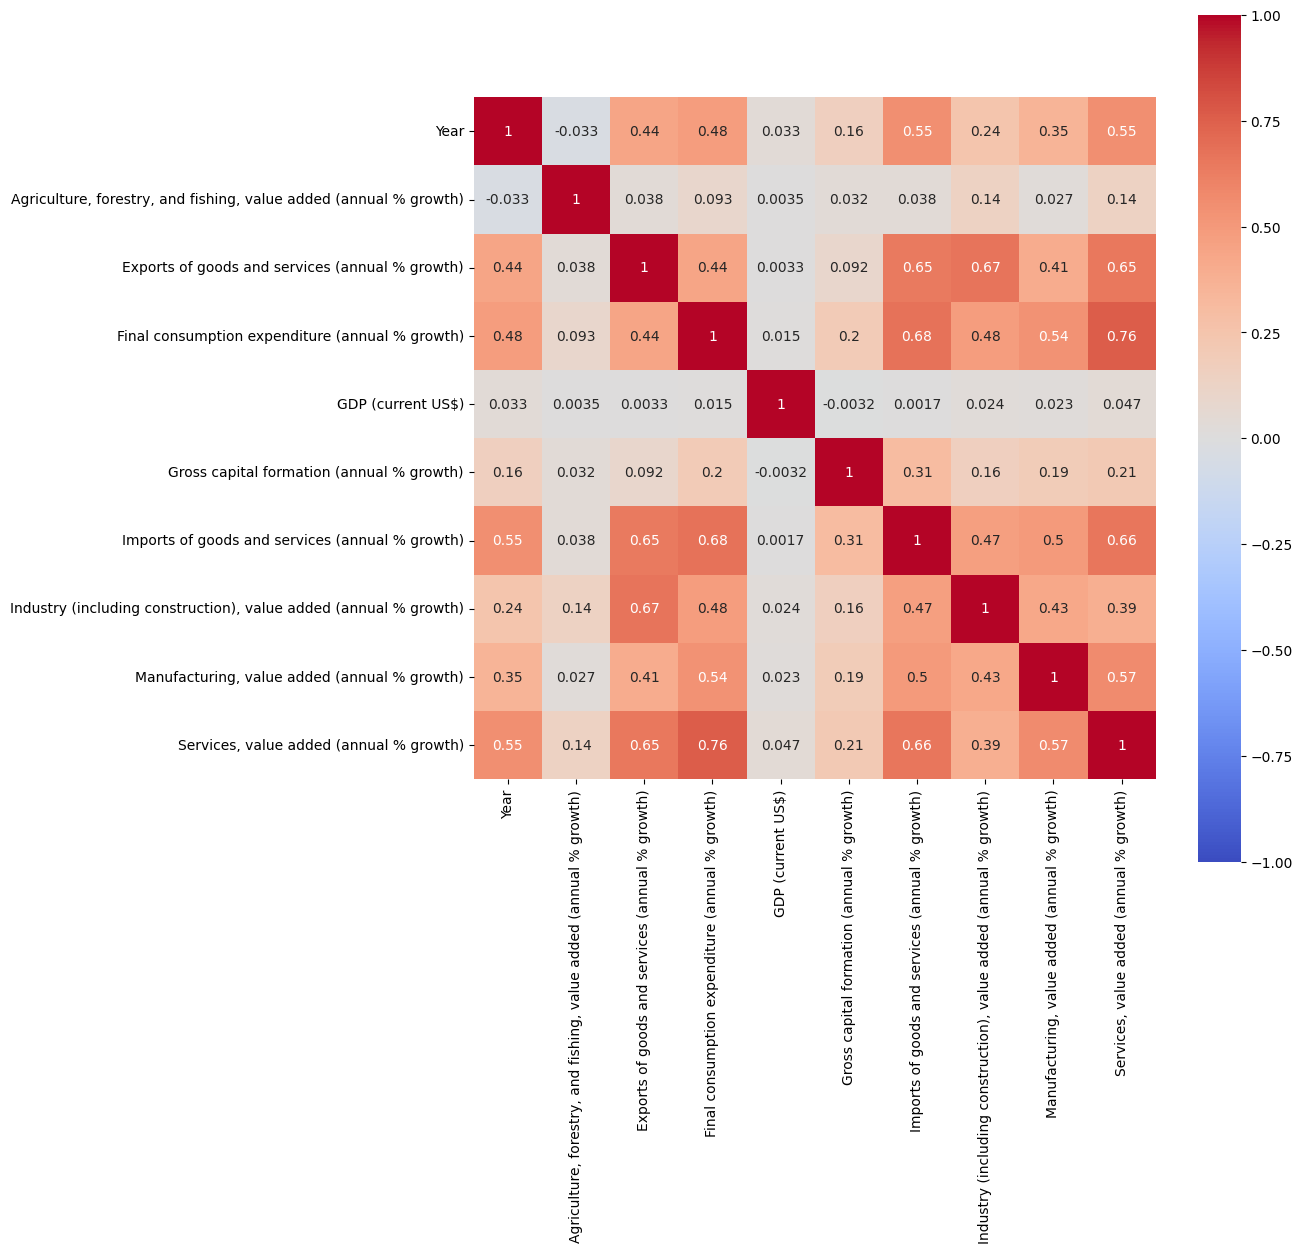

In [12]:
data_corr(dataset_economic)

In [13]:
dataset_epi = pd.read_csv("C:\\Users\\Sheldon\\Desktop\\Code\\Hackathon\\epi2022results05302022.csv")

In [14]:
dataset_epi.head()

,code,iso,country,region,EPI.new,HLT.new,AIR.new,HAD.new,PMD.new,OZD.new,...,CCH.rnk.old,CDA.rnk.old,CHA.rnk.old,FGA.rnk.old,NDA.rnk.old,BCA.rnk.old,GHN.rnk.old,LCB.rnk.old,GIB.rnk.old,GHP.rnk.old
0,4,AFG,Afghanistan,Southern Asia,43.6,16.0,15.5,7.4,16.0,18.4,...,159,161,164,NaN,141,142,112,12.0,129,1
1,24,AGO,Angola,Sub-Saharan Africa,30.5,20.5,23.1,17.9,24.0,36.8,...,81,29,35,77.0,132,105,119,135.0,1,87
2,8,ALB,Albania,Eastern Europe,47.1,40.0,37.5,34.5,36.7,63.7,...,108,156,26,77.0,70,173,39,37.0,25,67
3,784,ARE,United Arab Emirates,Greater Middle East,52.4,49.4,41.7,100.0,3.4,20.4,...,171,143,112,37.0,163,134,157,162.0,141,173
4,32,ARG,Argentina,Latin America & Caribbean,41.1,56.3,52.0,60.5,48.2,51.8,...,148,99,107,59.0,128,1,160,128.0,93,134


In [15]:
dataset_epi.iloc[0]

code                       4
iso                      AFG
country          Afghanistan
region         Southern Asia
EPI.new                 43.6
                   ...      
BCA.rnk.old              142
GHN.rnk.old              112
LCB.rnk.old             12.0
GIB.rnk.old              129
GHP.rnk.old                1
Name: 0, Length: 279, dtype: object

In [16]:
dataset["Country"]

0          DE
1          CN
2          GB
3          AU
4          ES
           ..
3173341    US
3173342    US
3173343    US
3173344    FR
3173345    DE
Name: Country, Length: 2821016, dtype: object

In [25]:
(dataset.loc[dataset["Operations"] == "France Operations"])["Country"].unique()

array(['FR'], dtype=object)